# Actividad 2 Comparación de grupos: Campañas de Ventas

#### Carlos Alberto Quintana Saucedo - A00807318

## Importación y procesamiento de datos.

In [305]:
# Importar librerías necesarias.
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#Definición de variables globales:
alpha = 0.05

In [20]:
# Importación, Preprocesamiento y Análisis inicial del data frame.
df = pd.read_csv('https://github.com/EGADE00807318/IN4036.50_GPO_CampanasPublicidad/raw/main/raw/b08_practica%20-%20datos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Campaña      59 non-null     object
 1   Fecha        59 non-null     object
 2   Gasto        59 non-null     int64 
 3   Impresiones  59 non-null     int64 
 4   Alcance      59 non-null     int64 
 5   Clicks       59 non-null     int64 
 6   Busquedas    59 non-null     int64 
 7   Vistas       59 non-null     int64 
 8   NumCarritos  59 non-null     int64 
 9   Compras      59 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ KB


##### Nota: Cabe mencionar que al tener dos campañas en el mismo rango de fechas, hemos notado que deberíamos de tener un set de 30+30 datos, con un total de 60.
##### Analizando un poco más los datos logramos percibir que nos falta la fecha de 8/5/2019 para la campaña de Control.

In [22]:
# Análisis de la suma total de datos Nulos dentro de cada columna.
df.isnull().sum()

Campaña        0
Fecha          0
Gasto          0
Impresiones    0
Alcance        0
Clicks         0
Busquedas      0
Vistas         0
NumCarritos    0
Compras        0
dtype: int64

In [24]:
# Búsqueda de datos duplicados en el data frame.
df[df.duplicated()]

,Campaña,Fecha,Gasto,Impresiones,Alcance,Clicks,Busquedas,Vistas,NumCarritos,Compras


In [86]:
# Identifica qué observaciones tienen datos perdidos 
df[df.isna().any(axis=1)]

,Campaña,Fecha,Gasto,Impresiones,Alcance,Clicks,Busquedas,Vistas,NumCarritos,Compras


In [84]:
# Obtención de datos estadísticos del data frame.
df.describe()

,Gasto,Impresiones,Alcance,Clicks,Busquedas,Vistas,NumCarritos,Compras
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [28]:
# Ejemplo de la cabecera del data frame como referencia inicial.
df.head()

,Campaña,Fecha,Gasto,Impresiones,Alcance,Clicks,Busquedas,Vistas,NumCarritos,Compras
0,Control,8/1/2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control,8/2/2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control,8/3/2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control,8/4/2019,1940,72878,61235,3065,1042,982,1183,340
4,Control,8/6/2019,3083,109076,87998,4028,1709,1249,784,764


In [112]:
# Se agrega nuevo renglón al data frame de la fecha faltante con las medias de cada uno de los valores respecto a la campaña de Control.
new_row = {'Campaña': 'Control', 'Fecha': '8/5/2019','Gasto': df[(df['Campaña'] == 'Control')]['Gasto'].mean().round(),'Impresiones': df[(df['Campaña'] == 'Control')]['Impresiones'].mean().round(),'Alcance': df[(df['Campaña'] == 'Control')]['Alcance'].mean().round(),'Clicks': df[(df['Campaña'] == 'Control')]['Clicks'].mean().round(),'Busquedas': df[(df['Campaña'] == 'Control')]['Busquedas'].mean().round(),'Vistas': df[(df['Campaña'] == 'Control')]['Vistas'].mean().round(),'NumCarritos': df[(df['Campaña'] == 'Control')]['NumCarritos'].mean().round(),'Compras': df[(df['Campaña'] == 'Control')]['Compras'].mean().round()}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [127]:
# Validamos el nuevo renglón insertado con la media de todos los valores numéricos:
df.tail()

,Campaña,Fecha,Gasto,Impresiones,Alcance,Clicks,Busquedas,Vistas,NumCarritos,Compras
55,Test,8/27/2019,2915.0,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
56,Test,8/28/2019,2247.0,54627.0,41267.0,8144.0,2432.0,1281.0,1009.0,721.0
57,Test,8/29/2019,2805.0,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
58,Test,8/30/2019,1977.0,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0
59,Control,8/5/2019,2304.0,109560.0,88845.0,5321.0,2221.0,1944.0,1300.0,523.0


## Análisis estadístico.

**Prueba T**

Realizaremos una prueba t para comparar dos proporciones.
Utilizaremos una prueba bilateral, por lo tanto, las hipótesis se plantean como:

Planteamiento de hipótesis:

- $H_0: \mu_1 = \mu_2$    (Hipótesis nula) [No existe una relación entre las dos variables.]
- $H_1: \mu_1 \neq \mu_2$ (Hipótesis alternativa)

In [120]:
# Estadística descriptiva para la variable de Impresiones (aplicando un método de agregación)
df.groupby('Campaña').agg({'Impresiones':'mean'})

,Impresiones
Campaña,
Control,109559.766667
Test,74584.800000


In [132]:
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Impresiones']
experimental = df[df['Campaña'] == 'Test']['Impresiones']

# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: 4.969500434849533
Valor p: 6.273684428098891e-06


In [134]:
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.


In [353]:
# Estadística descriptiva para la variable de Gasto (aplicando un método de agregación)
df.groupby('Campaña').agg({'Impresiones':'mean'})

,Impresiones
Campaña,
Control,109559.766667
Test,74584.800000


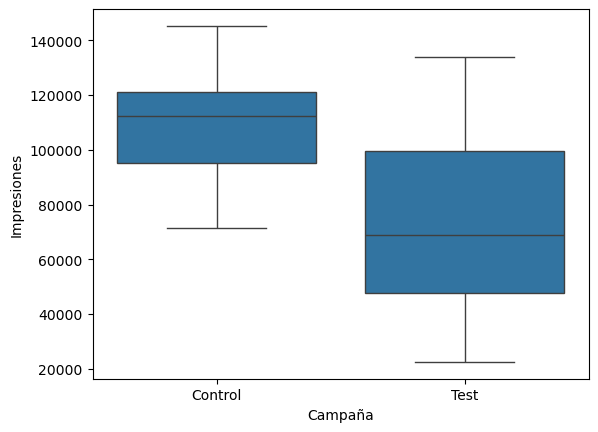

In [351]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Impresiones
sns.boxplot(x = "Campaña", y = "Impresiones", data = df);

-----------------------------------------
La teroría nos comenta que si la muestra es pequeña (p<30) se requiere evaluar la normalidad en la distribución de los datos.

En este caso en particular, la muestra es mayor a la condicional, pero como *experimentación* aplicaremos una prueba de **Shapiro-Wilk** sobre la variable de **Impresiones** solo para observar la normalidad de los datos en esta columna.

In [146]:
# Aplicamos solo como experimentación de resultados la evaluación de la normalidad en la distribución de los datos con Shapiro-Wilk
stat, p_value = stats.shapiro(df['Impresiones'])
print("Estadístico de prueba:", stat)
print("Valor p:", p_value)

Estadístico de prueba: 0.9518315811644074
Valor p: 0.019007372363126215


In [160]:
# Interpretar los resultados de la normalidad:
if p_value < alpha: print("Se rechaza la hipótesis nula de normalidad en los datos.")
else: print("No se puede rechazar la hipótesis nula de normalidad en los datos.")

Se rechaza la hipótesis nula de normalidad en los datos.


-----------------------------------------

##### **(Se continúa con la evaluación de las demás variables)**

In [358]:
# Estadística descriptiva para la variable de Alcance (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Gasto':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Gasto']
experimental = df[df['Campaña'] == 'Test']['Gasto']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

               Gasto
Campaña             
Control  2304.066667
Test     2563.066667


Estadístico t: -2.841847334129529
Valor p: 0.006180448152954714


Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.


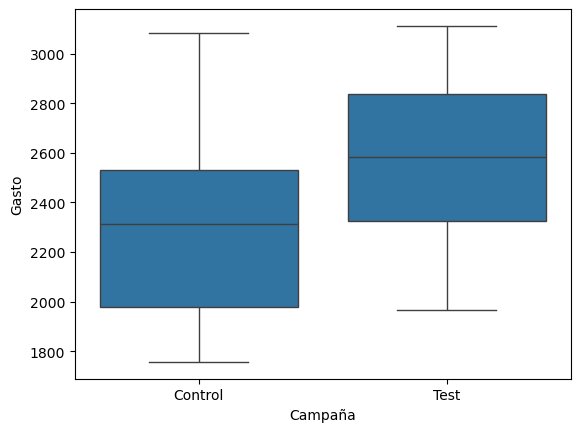

In [361]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Gasto", data = df);

In [180]:
# Estadística descriptiva para la variable de Alcance (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Alcance':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Alcance']
experimental = df[df['Campaña'] == 'Test']['Alcance']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

              Alcance
Campaña              
Control  88844.933333
Test     53491.566667


Estadístico t: 5.392567159520321
Valor p: 1.3332057238562505e-06


Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.


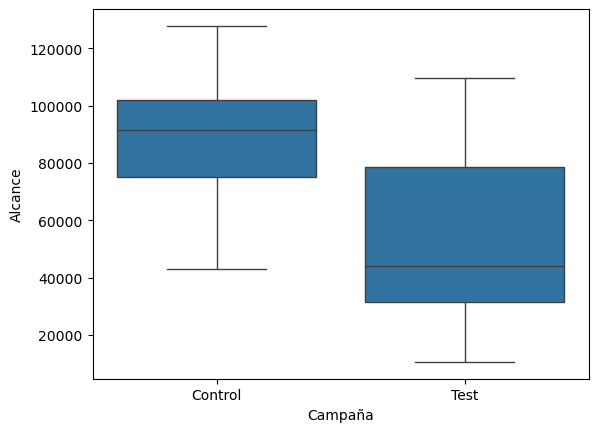

In [363]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Alcance", data = df);

In [182]:
# Estadística descriptiva para la variable de Clicks (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Clicks':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Clicks']
experimental = df[df['Campaña'] == 'Test']['Clicks']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

              Clicks
Campaña             
Control  5320.800000
Test     6032.333333


Estadístico t: -1.6043204222436545
Valor p: 0.11407550324170806


No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.


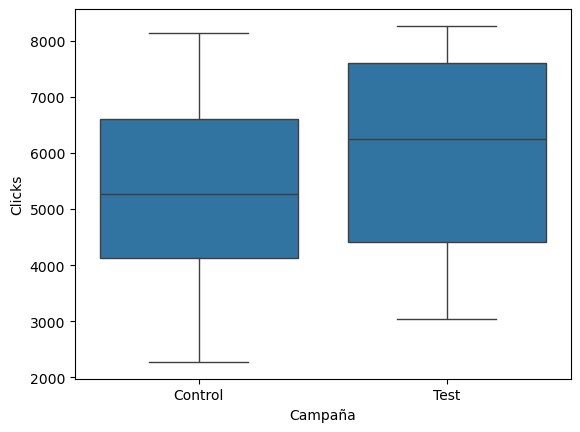

In [365]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Clicks", data = df);

In [184]:
# Estadística descriptiva para la variable de Busquedas (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Busquedas':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Busquedas']
experimental = df[df['Campaña'] == 'Test']['Busquedas']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

           Busquedas
Campaña             
Control  2221.300000
Test     2418.966667


Estadístico t: -1.157175832631501
Valor p: 0.25194409832146725


No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.


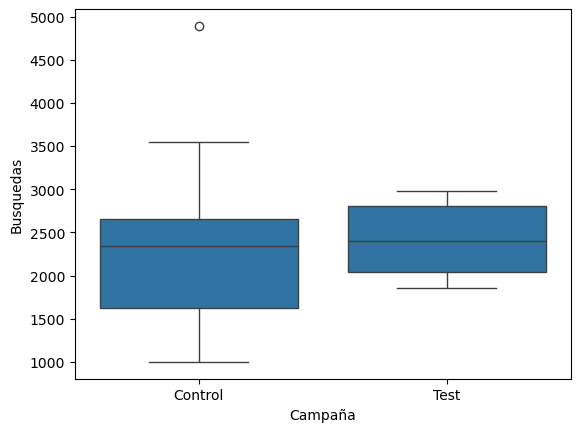

In [367]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Busquedas", data = df);
# Nota: Cabe mencionar que en esta variable se detecta un valor atípico dentro del set de datos.

In [188]:
# Estadística descriptiva para la variable de Vistas (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Vistas':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Vistas']
experimental = df[df['Campaña'] == 'Test']['Vistas']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

         Vistas
Campaña        
Control  1943.8
Test     1858.0


Estadístico t: 0.48447506712203964
Valor p: 0.629873332724594


No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.


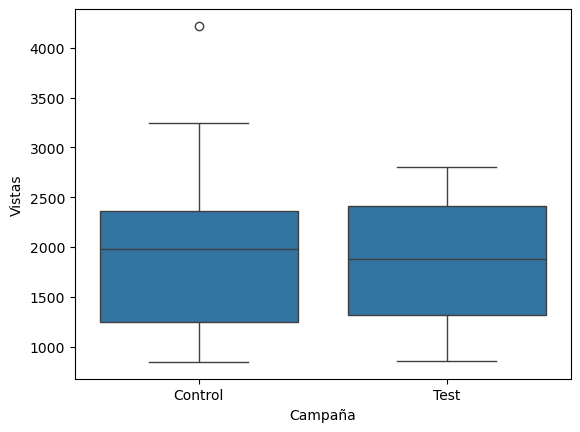

In [369]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Vistas", data = df);
# Nota: Se detecta valor atípico dentro del grupo de Control

In [190]:
# Estadística descriptiva para la variable de NumCarritos (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'NumCarritos':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['NumCarritos']
experimental = df[df['Campaña'] == 'Test']['NumCarritos']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

         NumCarritos
Campaña             
Control  1300.000000
Test      881.533333


Estadístico t: 4.3229665186173625
Valor p: 6.124488718225843e-05


Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.


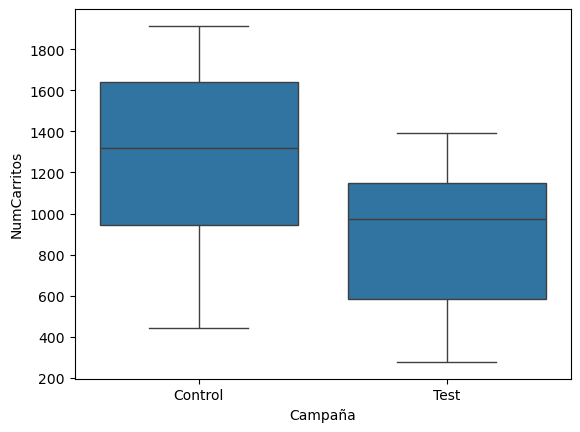

In [371]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "NumCarritos", data = df);

In [192]:
# Estadística descriptiva para la variable de Compras (aplicando un método de agregación)
print(df.groupby('Campaña').agg({'Compras':'mean'}))
print('\n')
# Filtramos los datos para obtener los grupos
control = df[df['Campaña'] == 'Control']['Compras']
experimental = df[df['Campaña'] == 'Test']['Compras']
# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(control, experimental)
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('\n')
# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

            Compras
Campaña            
Control  522.800000
Test     521.233333


Estadístico t: 0.03080469891258519
Valor p: 0.9755310519815795


No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.


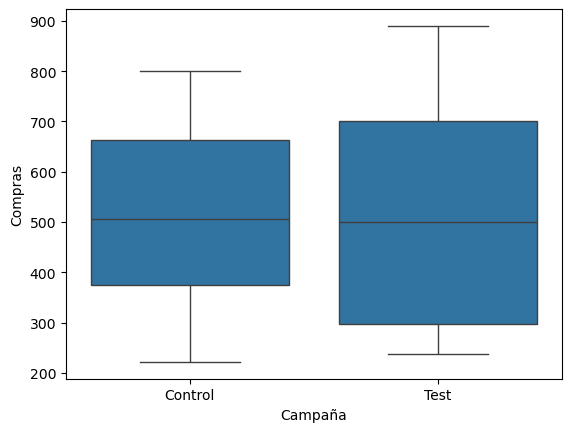

In [373]:
# Se genera un diagrama de caja para comparar gráficamente los dos tipos de campaña respecto a la variable Gasto
sns.boxplot(x = "Campaña", y = "Compras", data = df);

--------------------------------------------------

**Prueba ANOVA**

El análisis de varianza (ANOVA) describe a un conjunto técnicas estadísticas que se utilizan para comparar la media entre dos o más grupos. La hipótesis nula es que todas las medias son iguales mientras que la hipótesis alternativa plantea que al menos una es diferente.

In [200]:
# Filtramos los datos para obtener los grupos respecto a la variable de Gasto
control = df[df['Campaña'] == 'Control']['Gasto'] 
experimental = df[df['Campaña'] == 'Test']['Gasto'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 8.07609627049911
Valor p: 0.006180448152954734
Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.


In [202]:
# Filtramos los datos para obtener los grupos respecto a la variable de Impresiones
control = df[df['Campaña'] == 'Control']['Impresiones'] 
experimental = df[df['Campaña'] == 'Test']['Impresiones'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 24.695934571969705
Valor p: 6.273684428098901e-06
Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.


In [204]:
# Filtramos los datos para obtener los grupos respecto a la variable de Alcance
control = df[df['Campaña'] == 'Control']['Alcance'] 
experimental = df[df['Campaña'] == 'Test']['Alcance'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 29.07978056993706
Valor p: 1.3332057238562592e-06
Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.


In [206]:
# Filtramos los datos para obtener los grupos respecto a la variable de Clicks
control = df[df['Campaña'] == 'Control']['Clicks'] 
experimental = df[df['Campaña'] == 'Test']['Clicks'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 2.57384401722806
Valor p: 0.11407550324170754
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.


In [208]:
# Filtramos los datos para obtener los grupos respecto a la variable de Busquedas
control = df[df['Campaña'] == 'Control']['Busquedas'] 
experimental = df[df['Campaña'] == 'Test']['Busquedas'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 1.3390559076264108
Valor p: 0.25194409832146714
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.


In [210]:
# Filtramos los datos para obtener los grupos respecto a la variable de Vistas
control = df[df['Campaña'] == 'Control']['Vistas'] 
experimental = df[df['Campaña'] == 'Test']['Vistas'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 0.234716090662905
Valor p: 0.6298733327245905
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.


In [212]:
# Filtramos los datos para obtener los grupos respecto a la variable de NumCarritos
control = df[df['Campaña'] == 'Control']['NumCarritos'] 
experimental = df[df['Campaña'] == 'Test']['NumCarritos'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 18.688039521086715
Valor p: 6.124488718225836e-05
Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.


In [214]:
# Filtramos los datos para obtener los grupos respecto a la variable de Compras
control = df[df['Campaña'] == 'Control']['Compras'] 
experimental = df[df['Campaña'] == 'Test']['Compras'] 
# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < alpha: print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Estadístico de prueba de ANOVA: 0.0009489294750951005
Valor p: 0.975531051981608
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.


--------------------------------------------------

**Prueba Mann-Whitney**

Una alternativa no paramétrica a la prueba t es la prueba de Mann-Whitney. Esto es recomendable cuando no se cumple el supuesto de normalidad de los datos.

In [228]:
# Definición de una función de evaluación con interpretación de acuerdo a lo estudiado para Mann-Whitney.
def eval_hipotesis_mann_whitney(statistic, p_value):
    if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.")
    else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución")

In [232]:
# Filtramos los datos para obtener los grupos respecto a la variable de Gasto
control = df[df['Campaña'] == 'Control']['Gasto'] 
experimental = df[df['Campaña'] == 'Test']['Gasto'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 264.0
Valor p: 0.006097142345173946
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.


In [234]:
# Filtramos los datos para obtener los grupos respecto a la variable de Impresiones
control = df[df['Campaña'] == 'Control']['Impresiones'] 
experimental = df[df['Campaña'] == 'Test']['Impresiones'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 721.0
Valor p: 6.356042543170036e-05
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.


In [236]:
# Filtramos los datos para obtener los grupos respecto a la variable de Alcance
control = df[df['Campaña'] == 'Control']['Alcance'] 
experimental = df[df['Campaña'] == 'Test']['Alcance'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 743.0
Valor p: 1.5291673925716366e-05
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.


In [238]:
# Filtramos los datos para obtener los grupos respecto a la variable de Clicks
control = df[df['Campaña'] == 'Control']['Clicks'] 
experimental = df[df['Campaña'] == 'Test']['Clicks'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 349.0
Valor p: 0.13732283484699292
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución


In [240]:
# Filtramos los datos para obtener los grupos respecto a la variable de Busquedas
control = df[df['Campaña'] == 'Control']['Busquedas'] 
experimental = df[df['Campaña'] == 'Test']['Busquedas'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 359.0
Valor p: 0.1808934738990854
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución


In [242]:
# Filtramos los datos para obtener los grupos respecto a la variable de Vistas
control = df[df['Campaña'] == 'Control']['Vistas'] 
experimental = df[df['Campaña'] == 'Test']['Vistas'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 458.0
Valor p: 0.9117053103328743
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución


In [244]:
# Filtramos los datos para obtener los grupos respecto a la variable de NumCarritos
control = df[df['Campaña'] == 'Control']['NumCarritos'] 
experimental = df[df['Campaña'] == 'Test']['NumCarritos'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 691.0
Valor p: 0.0003770395640831686
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.


In [246]:
# Filtramos los datos para obtener los grupos respecto a la variable de Compras
control = df[df['Campaña'] == 'Control']['Compras'] 
experimental = df[df['Campaña'] == 'Test']['Compras'] 

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_mann_whitney(statistic=statistic, p_value=p_value)

Estadístico de prueba U: 455.0
Valor p: 0.9469515266277105
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución


--------------------------------------------------

**Prueba Kruskal-Wallis**

Una alternativa más sería utilizar la prueba de Kruskal-Wallis, considerada cuando los datos son desbalanceados o sesgados.

In [258]:
# Definición de una función de evaluación con interpretación de acuerdo a lo estudiado para Kruskal-Wallis.
def eval_hipotesis_kruskal_allis(statistic, p_value):
    if p_value < alpha: print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.")
    else: print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.")

In [262]:
# Filtramos los datos para obtener los grupos respecto a la variable Gasto
control = df[df['Campaña'] == 'Control']['Gasto'] 
experimental = df[df['Campaña'] == 'Test']['Gasto'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 7.561967213114741
Valor p: 0.005961288528864843
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.


In [264]:
# Filtramos los datos para obtener los grupos respecto a la variable Impresiones
control = df[df['Campaña'] == 'Control']['Impresiones'] 
experimental = df[df['Campaña'] == 'Test']['Impresiones'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 16.05267759562841
Valor p: 6.160445128152299e-05
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.


In [266]:
# Filtramos los datos para obtener los grupos respecto a la variable Alcance
control = df[df['Campaña'] == 'Control']['Alcance'] 
experimental = df[df['Campaña'] == 'Test']['Alcance'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 18.764808743169397
Valor p: 1.478706364173976e-05
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.


In [268]:
# Filtramos los datos para obtener los grupos respecto a la variable Clicks
control = df[df['Campaña'] == 'Control']['Clicks'] 
experimental = df[df['Campaña'] == 'Test']['Clicks'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 2.229726775956294
Valor p: 0.13537778532322509
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.


In [270]:
# Filtramos los datos para obtener los grupos respecto a la variable Busquedas
control = df[df['Campaña'] == 'Control']['Busquedas'] 
experimental = df[df['Campaña'] == 'Test']['Busquedas'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 1.810104939472233
Valor p: 0.17849564192002884
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.


In [272]:
# Filtramos los datos para obtener los grupos respecto a la variable Vistas
control = df[df['Campaña'] == 'Control']['Vistas'] 
experimental = df[df['Campaña'] == 'Test']['Vistas'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 0.013990237215292429
Valor p: 0.9058455398570052
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.


In [274]:
# Filtramos los datos para obtener los grupos respecto a la variable NumCarritos
control = df[df['Campaña'] == 'Control']['NumCarritos'] 
experimental = df[df['Campaña'] == 'Test']['NumCarritos'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 12.695300546448095
Valor p: 0.000366575678090334
Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.


In [276]:
# Filtramos los datos para obtener los grupos respecto a la variable Compras
control = df[df['Campaña'] == 'Control']['Compras'] 
experimental = df[df['Campaña'] == 'Test']['Compras'] 

# Aplicar la prueba Kruskal-Wallis
statistic, p_value = kruskal(control, experimental)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
eval_hipotesis_kruskal_allis(statistic=statistic, p_value=p_value)

Estadístico de prueba de Kruskal-Wallis: 0.005465392026077901
Valor p: 0.9410674454664939
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.


------------------------------------